Some exploratory analysis to understand the data

In [7]:
import pandas as pd
import time, json, os, random, traceback, pyperclip, importlib
import matplotlib.pyplot as plt
import seaborn as sns
import src.wiki_analysis_utils as wiki_analysis_utils

_ = importlib.reload(wiki_analysis_utils)

In [2]:
data_root_dir = r'D:\WikipediaDataset\data\\'

In [3]:
page_name_to_page_id, page_id_to_page_name, error_counts = \
    wiki_analysis_utils.load_page_name_to_id_map(data_root_dir, silent=True)

categories, failure_counts = wiki_analysis_utils.load_category_name_to_id_map(data_root_dir, silent=True)

In [ ]:
category_stats = pd.read_csv(data_root_dir + 'category_id_to_stats.tsv', sep='\t')

In [45]:
page_inlink_counts = pd.read_csv(data_root_dir + 'page_inlink_counts.tsv', sep='\t')\
    .astype({'NumInlinks': 'int32'})

page_stats = []
# read page_info.tsv chunk by chunk
for chunk in pd.read_csv(data_root_dir + 'page_info.tsv', sep='\t', chunksize=10000):
    chunk['IsRedirect'] = chunk['RedirectTitle'].notnull()
    cols_to_keep = ["IsRedirect", "PageId", "TextLength", "NumUniqueWords", "NumInternalLinks",
                             "NumFiles", "NumExternalLinks", "NumInfoBoxes", "NumSections"]
    page_stats.append(chunk[cols_to_keep].fillna(0).astype({col: 'int32' for col in cols_to_keep if col != 'IsRedirect'}))

page_stats = pd.concat(page_stats)
page_stats = page_stats.merge(page_inlink_counts, on='PageId', how='left')
page_stats = page_stats.fillna(0).astype({'NumInlinks': 'int32'})

In [46]:
page_stats[page_stats['IsRedirect'] == False].describe()

,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
count,6.811031e+06,6.811031e+06,6.811031e+06,6.811031e+06,6.811031e+06,6.811031e+06,6.811031e+06,6.811031e+06,6.811031e+06
mean,3.309705e+07,5.514785e+02,2.693885e+02,3.366365e+01,7.672025e-01,1.012959e+01,6.932977e-01,6.208850e+00,2.435635e+01
std,2.290041e+07,1.100198e+03,3.832685e+02,7.002825e+01,7.711118e+00,2.778776e+01,9.878762e-01,6.698235e+00,2.799342e+02
min,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.244403e+07,8.900000e+01,6.500000e+01,9.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00
50%,3.156706e+07,2.400000e+02,1.530000e+02,1.700000e+01,0.000000e+00,4.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
75%,5.257221e+07,5.760000e+02,3.190000e+02,3.400000e+01,0.000000e+00,9.000000e+00,1.000000e+00,7.000000e+00,1.500000e+01
max,7.678836e+07,7.094500e+04,2.034200e+04,1.336100e+04,4.259000e+03,3.279000e+03,8.920000e+02,1.268000e+03,2.764690e+05


In [47]:
page_stats[page_stats['IsRedirect'] == True].describe()

,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
count,1.092134e+07,10921337.0,10921337.0,10921337.0,10921337.0,10921337.0,10921337.0,10921337.0,1.092134e+07
mean,3.775827e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.746496e+00
std,2.281181e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.688373e+02
min,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
25%,1.773061e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
50%,3.735056e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
75%,5.774277e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
max,7.678836e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.554620e+05


In [48]:
page_stats = page_stats[page_stats['IsRedirect'] == False].drop(columns=['IsRedirect'])

Investigating columns: TextLength
Stats: percentiles: {0: 0.0, 5: 29.0, 10: 40.0, 25: 89.0, 50: 240.0, 75: 576.0, 90: 1242.0, 95: 2002.0, 100: 70945.0}, mean: 551.4785290215241


Top-10 and Bottom-10 extreme values




,PageName,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
8351200,list of characters in mythology novels by rick riordan,32770618,70945,11200,1046,0,22,0,89,658
5629984,list of supernatural and the winchesters characters,21013155,68809,10365,509,1,19,0,143,548
16438897,list of hindi songs recorded by asha bhosle,70687805,67893,13234,1711,0,104,0,74,0
37718,list of battles by geographic location,57197,66509,8874,6618,0,1,0,164,6
2538907,municipal history of quebec,7285706,64113,7744,1327,1,55,0,194,58
3480933,glossary of baseball terms,11843604,62437,12049,1364,10,379,0,1268,1821
15690000,list of monarchs of fictional countries,67482183,58178,13283,1671,0,54,0,483,4
254110,list of accidents and incidents involving commercial aircraft,409566,55923,8177,1765,97,7,0,117,284
2353845,list of statutory rules and orders of northern ireland,6523063,54261,3217,57,0,0,0,49,0
16927466,sexton blake bibliography part 2: 1912-1945,72864833,52286,5747,28,0,8,1,40,5


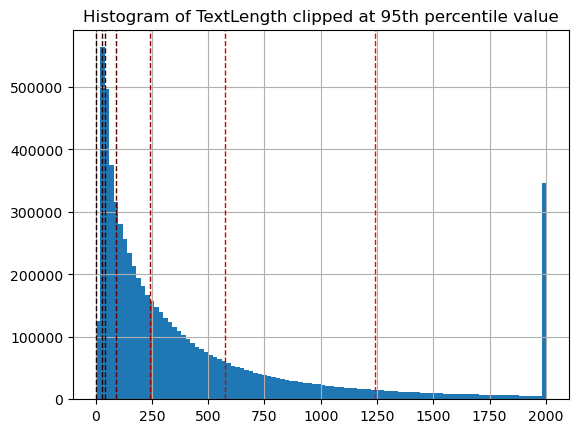

Investigating columns: NumUniqueWords
Stats: percentiles: {0: 0.0, 5: 23.0, 10: 32.0, 25: 65.0, 50: 153.0, 75: 319.0, 90: 607.0, 95: 893.0, 100: 20342.0}, mean: 269.3885008011269


Top-10 and Bottom-10 extreme values




,PageName,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
11078423,list of united states counties by per capita income,45039292,27544,20342,3306,1,7,0,3,14
1481079,list of film director–composer collaborations,3389561,33168,15007,8853,0,2,0,26,13
209843,list of people from illinois,329945,39820,14639,8575,132,19,0,30,6
3533981,list of stage names,12089729,21907,14191,4613,0,1,0,32,16
9425407,list of folk songs by roud number,37653157,29598,14115,1340,0,12,0,82,0
11577925,1943 birthday honours,47807310,43239,13394,422,0,0,0,74,47
15690000,list of monarchs of fictional countries,67482183,58178,13283,1671,0,54,0,483,4
16438897,list of hindi songs recorded by asha bhosle,70687805,67893,13234,1711,0,104,0,74,0
16863854,2023 deaths in the united states,72557200,40172,13210,4109,225,2402,0,14,0
1221072,index of singapore-related articles,2596980,46425,13083,13361,0,0,0,29,7


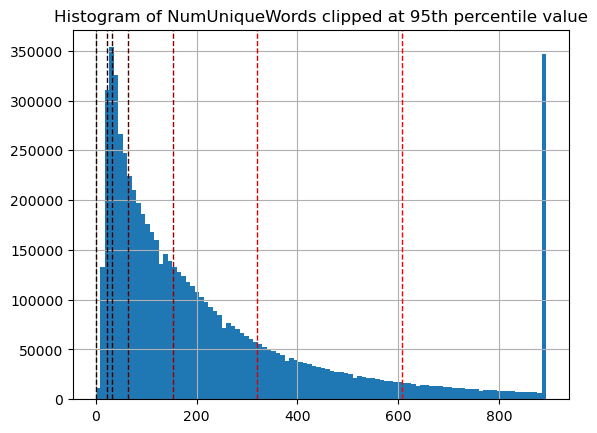

Investigating columns: NumInternalLinks
Stats: percentiles: {0: 0.0, 5: 3.0, 10: 5.0, 25: 9.0, 50: 17.0, 75: 34.0, 90: 69.0, 95: 110.0, 100: 13361.0}, mean: 33.663654298446154


Top-10 and Bottom-10 extreme values




,PageName,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
1221072,index of singapore-related articles,2596980,46425,13083,13361,0,0,0,29,7
765096,list of virus species,1460740,26981,11754,11292,1,5,0,30,13
5468903,list of birds by common name,20184453,48,38,10983,0,1,0,29,0
556854,list of association football stadiums by country,982732,17443,9398,9622,20,488,0,185,77
1481079,list of film director–composer collaborations,3389561,33168,15007,8853,0,2,0,26,13
209843,list of people from illinois,329945,39820,14639,8575,132,19,0,30,6
11898649,list of least concern birds,49471921,353,169,8044,0,1,0,176,8
6516599,alphabetical list of municipalities of italy,24669262,12166,7741,7959,0,1,0,27,2
2063067,list of biographical films,5426051,13474,10511,7293,0,24,0,13,21
12297174,list of least concern plants,51134805,11548,9016,7127,0,1,0,226,11


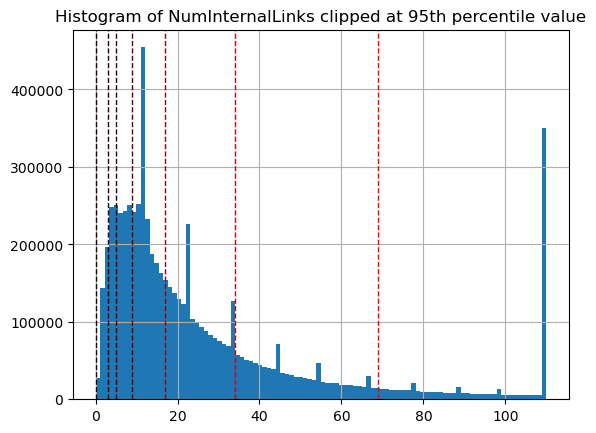

Investigating columns: NumFiles
Stats: percentiles: {0: 0.0, 5: 0.0, 10: 0.0, 25: 0.0, 50: 0.0, 75: 0.0, 90: 1.0, 95: 3.0, 100: 4259.0}, mean: 0.7672024984176404


Top-10 and Bottom-10 extreme values




,PageName,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
15779259,"list of everybody, sing! episodes",67886956,10805,3692,437,4259,415,1,8,0
5035966,comparison of european road signs,18379726,7890,1285,155,4127,17,0,20,26
10323364,comparison of mutcd-influenced traffic signs,41640676,7190,1124,130,2980,27,0,19,0
13855405,united states army enlisted rank insignia 1902-1920,58535343,4942,1202,14,2894,4,0,20,1
9519656,2013 itf men's circuit (july–september),38078922,12899,2989,716,2772,473,0,9,1
10794480,list of canonically crowned images,43726790,19773,4775,1732,2586,631,0,56,17
11240465,2015 itf men's circuit (april–june),46326221,14069,2114,638,2582,433,0,9,1
10560404,2014 itf men's circuit (july–september),42725510,11770,2826,672,2506,419,0,9,1
11240502,2015 itf men's circuit (july–september),46326415,13357,2161,647,2480,415,0,9,1
16923883,traffic signs in post-soviet states,72845087,5979,964,94,2329,41,0,26,10


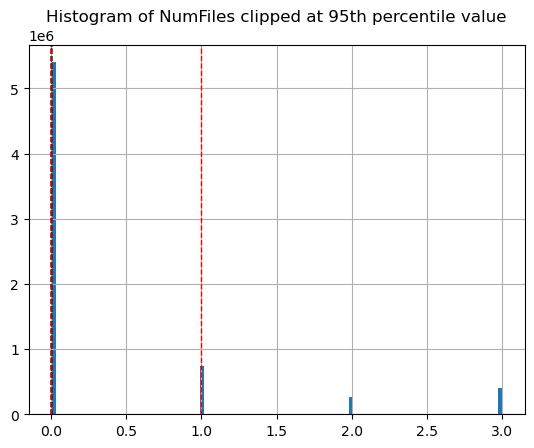

Investigating columns: NumExternalLinks
Stats: percentiles: {0: 0.0, 5: 0.0, 10: 0.0, 25: 1.0, 50: 4.0, 75: 9.0, 90: 21.0, 95: 37.0, 100: 3279.0}, mean: 10.129591100084554


Top-10 and Bottom-10 extreme values




,PageName,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
13507791,list of human transcription factors,56855846,20558,4505,60,0,3279,0,3,0
4506057,list of chess grandmasters,16175585,21264,9016,3137,0,3044,0,8,30
1629057,list of observatory codes,3862683,10837,6021,829,0,2510,0,3,4565
16863854,2023 deaths in the united states,72557200,40172,13210,4109,225,2402,0,14,0
16891701,list of other classes of keelboats & yachts,72683489,10805,1901,1950,8,2380,0,5,0
6659331,opinion polling for the 2015 united kingdom general election,25357343,7090,3407,98,2,2071,0,15,22
1708500,"list of statutory instruments of the united kingdom, 2005",4141835,30019,5856,3,0,2052,0,40,0
1779860,"list of statutory instruments of the united kingdom, 2003",4388005,30490,5928,4,0,2021,0,37,0
1074881,list of acts of the parliament of australia,2216730,16168,3500,90,0,2015,0,6,0
1779864,"list of statutory instruments of the united kingdom, 1999",4388012,29035,5539,4,0,1985,0,38,0


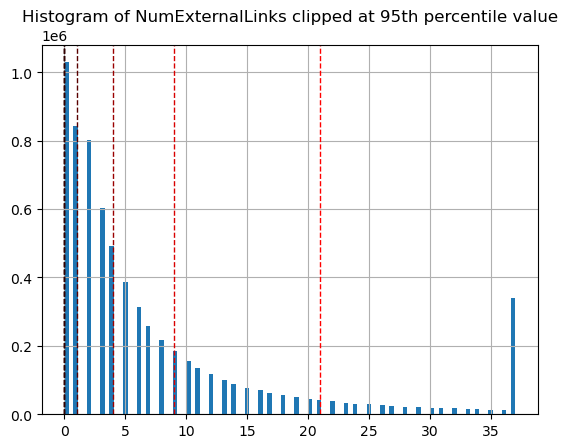

Investigating columns: NumInfoBoxes
Stats: percentiles: {0: 0.0, 5: 0.0, 10: 0.0, 25: 0.0, 50: 1.0, 75: 1.0, 90: 1.0, 95: 1.0, 100: 892.0}, mean: 0.6932976813642457


Top-10 and Bottom-10 extreme values




,PageName,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
11916009,list of new york city subway stations,49550666,3361,826,226,3,0,892,8,15
984012,list of longest-running american television series,2000858,11763,2862,882,0,49,578,14,49
13514375,list of indigenous canadian politicians,56887146,2527,1126,431,200,313,510,35,0
12095365,list of visible minority politicians in canada,50254536,7132,2249,889,482,419,412,48,0
125968,spectral line,177320,2502,870,94,98,9,295,20,1266
2706999,list of longest-running american primetime television series,8028825,2538,881,223,0,6,196,10,23
11304421,list of longest-running scripted american primetime television series,46631421,2297,720,196,0,1,185,4,18
8602663,former state routes in pennsylvania,33958954,7758,1894,511,2,79,152,155,126
13440916,list of evolve wrestling events,56538063,885,558,362,0,247,145,154,87
13515398,list of farm to market roads in texas (2300–2399),56891883,6798,1406,399,2,27,144,146,92


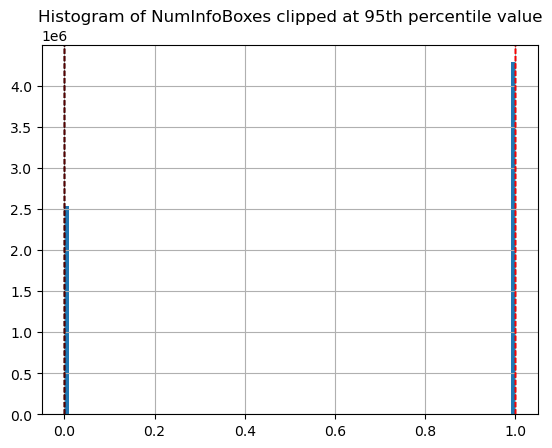

Investigating columns: NumSections
Stats: percentiles: {0: 0.0, 5: 2.0, 10: 2.0, 25: 3.0, 50: 5.0, 75: 7.0, 90: 12.0, 95: 16.0, 100: 1268.0}, mean: 6.208849585327097


Top-10 and Bottom-10 extreme values




,PageName,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
3480933,glossary of baseball terms,11843604,62437,12049,1364,10,379,0,1268,1821
6891764,iucn red list vulnerable species (animalia),26421645,26,24,7056,0,2,0,963,0
15839778,2022 indiana house of representatives election,68192502,4577,1088,264,2,173,1,899,15
3909062,list of australian rules football families,13591342,12076,3920,2139,0,316,0,881,57
17435059,2024 ohio house of representatives election,75329228,1685,950,218,1,113,1,881,3
16532298,2022 kentucky house of representatives election,71042160,4516,913,166,3,5,1,850,46
6893242,iucn red list endangered species (animalia),26428729,27,26,5406,1,2,0,838,0
1496556,list of general hospital characters,3445240,24282,7636,1041,0,95,0,784,0
8094222,2012 united states house of representatives elections in california,31569379,6966,1957,508,4,357,10,781,171
2085531,list of mesh codes (d12.776),5505240,4976,1298,1129,0,1,0,755,30


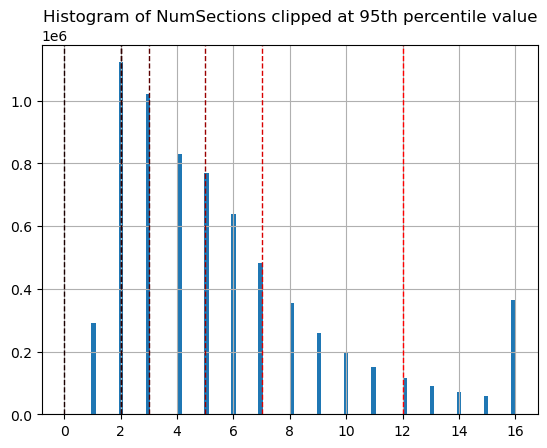

Investigating columns: NumInlinks
Stats: percentiles: {0: 0.0, 5: 0.0, 10: 0.0, 25: 2.0, 50: 5.0, 75: 15.0, 90: 39.0, 95: 74.0, 100: 276469.0}, mean: 24.356352217454305


Top-10 and Bottom-10 extreme values




,PageName,PageId,TextLength,NumUniqueWords,NumInternalLinks,NumFiles,NumExternalLinks,NumInfoBoxes,NumSections,NumInlinks
1493588,united states,3434750,11886,4394,1288,44,571,1,51,276469
332193,midfielder,548981,4816,1458,172,12,108,0,21,136271
17223717,indian national developmental inclusive alliance,74383370,2202,1113,301,88,90,1,28,129116
1886480,world war i,4764461,15685,4959,732,53,249,2,69,108968
2127782,iran standard time,5650783,454,219,24,0,7,0,7,99536
362449,catholic church,606848,17326,5435,859,26,392,1,52,99278
35093,village,53509,6199,2418,363,30,62,0,49,98932
5270475,the guardian,19344515,11901,4371,638,7,627,1,47,97815
1960379,canada,5042916,10912,3854,927,32,641,1,37,87583
3201,california,5407,17076,5635,1318,68,444,2,58,82103


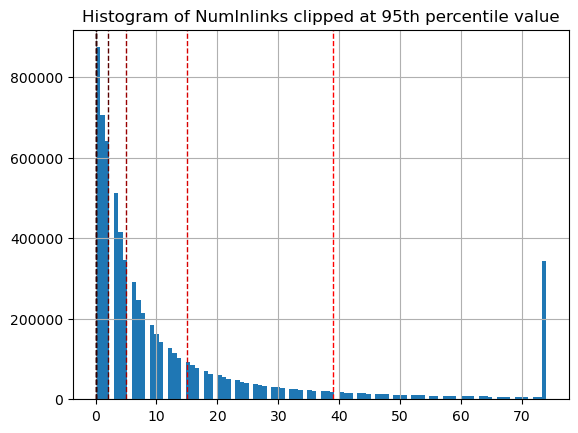

In [49]:
for col in page_stats.columns:
    if col=='PageId': continue
    print (f"Investigating columns: {col}")

    # obtain 95th percentile value
    percentiles = {level: page_stats[col].quantile(level/100) for level in [0, 5, 10, 25, 50, 75, 90, 95, 100]}
    mean = page_stats[col].mean()
    print (f"Stats: percentiles: {percentiles}, mean: {mean}")

    # see top and bottom 10 values
    top_values = page_stats.sort_values(col, ascending=False).head(10)
    bottom_values = page_stats.sort_values(col, ascending=True).head(10)
    extremes = pd.concat([top_values, bottom_values])
    # insert page name as first column
    extremes.insert(0, 'PageName', extremes['PageId'].map(page_id_to_page_name))

    print ("\n\nTop-10 and Bottom-10 extreme values\n\n")
    with pd.option_context('display.max_colwidth', 1000000):
        display(extremes)

    # see histogram of values and clip at 95th percentile
    page_stats[col].clip(upper=percentiles[95]).hist(bins=100)
    # mark percentile values (except for 95) as vertical lines
    for level in [0, 5, 10, 25, 50, 75, 90]:
        plt.axvline(percentiles[level], color=((level+10)/100, 0, 0), 
                    linestyle='dashed', linewidth=1, label=f'{level}th percentile')
    plt.title(f"Histogram of {col} clipped at 95th percentile value")
    plt.show()
    print ("=====================================================================") 

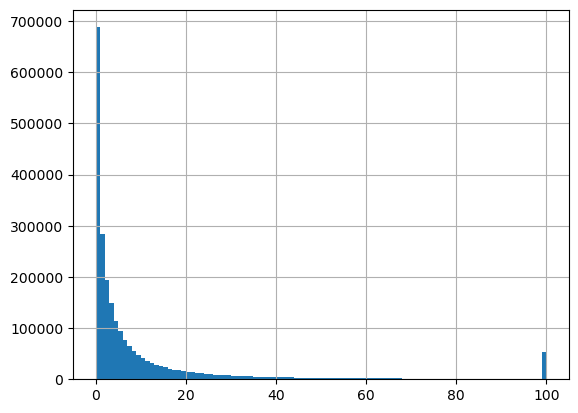

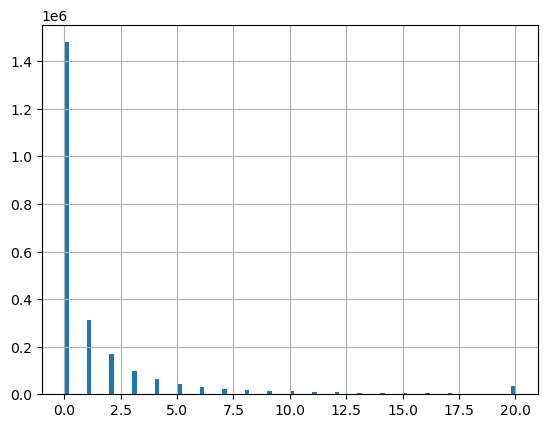

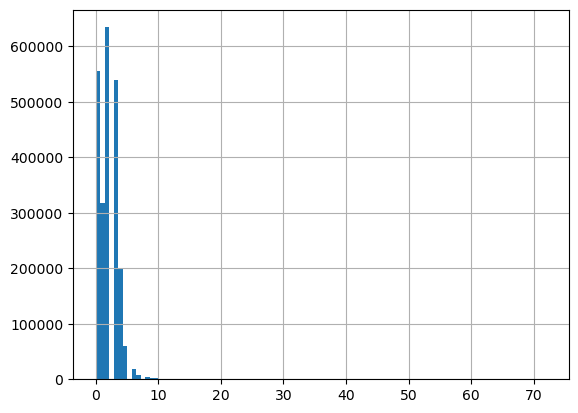

,NumPages,NumSubCategories,NumParentCategories
count,2.346796e+06,2.346796e+06,2.346796e+06
mean,1.590261e+01,1.958362e+00,1.958362e+00
std,7.320854e+02,1.478349e+01,1.601057e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.000000e+00,0.000000e+00,2.000000e+00
75%,9.000000e+00,1.000000e+00,3.000000e+00
max,1.084346e+06,9.685000e+03,7.200000e+01


In [21]:
for col, maxval in [('NumPages', 100), ('NumSubCategories', 20), ('NumParentCategories', 100)]:
    category_stats[col].apply(lambda x: min(x, maxval)).hist(bins=100)
    plt.show()
category_stats[['NumPages', 'NumSubCategories', 'NumParentCategories']]\
    .describe()

In [18]:
pdf = category_stats.sort_values(by='NumPages', ascending=False).head(10)
pdf['CategoryName'] = pdf['CategoryId'].apply(lambda x: categories['id_to_name'][x])
pdf

,CategoryId,NumPages,NumSubCategories,NumParentCategories,CategoryName
938310,26294350,1084346,2,1,living people
1524,11014529,153823,0,2,year of birth missing (living people)
1409928,11077587,65588,0,2,place of birth missing (living people)
1878292,26191743,63996,2,2,men's association football midfielders
470714,26188527,48203,2,2,men's association football forwards
1653951,26185725,47507,3,2,men's association football defenders
2227272,56842573,32173,0,1,taxonomy articles created by polbot
2113176,10661449,29814,3,2,english football league players
234327,4339873,25086,1,3,year of birth unknown
939534,74034269,24346,2,3,english men's footballers


In [19]:
pdf = category_stats.sort_values(by='NumSubCategories', ascending=False).head(10)
pdf['CategoryName'] = pdf['CategoryId'].apply(lambda x: categories['id_to_name'][x])
pdf

,CategoryId,NumPages,NumSubCategories,NumParentCategories,CategoryName
1924147,853600,0,9685,3,films by director
1943889,11240082,0,8917,2,songs by songwriter
1960023,5560107,0,4401,2,minor league baseball players by team
1920226,3541924,1,3938,3,musicians by band
317312,4887735,0,3506,3,wikipedia 1.0 assessments
777449,18301861,0,3461,3,films by american directors
2210003,6454137,0,3149,1,albums by producer
1827753,47286784,0,2832,4,taxa by author
1222304,51039492,0,2728,2,wikipedia categories named after basketball teams
1921311,9570041,0,2171,3,video games by company


In [20]:
pdf = category_stats.sort_values(by='NumParentCategories', ascending=False).head(10)
pdf['CategoryName'] = pdf['CategoryId'].apply(lambda x: categories['id_to_name'][x])
pdf

,CategoryId,NumPages,NumSubCategories,NumParentCategories,CategoryName
1414317,8944944,53,14,72,war in afghanistan (2001–2021)
70165,36079449,61,4,61,naxalite–maoist insurgency
476889,20536936,10,1,59,western european union
236100,19230513,46,13,58,september 11 attacks
1443304,43016789,42,2,57,insurgency in northeast india
1898293,1319222,61,10,54,gulf war
610495,74579583,4,0,51,ethnic conflicts in manipur
1646113,12430474,73,10,51,muslim brotherhood
1933421,23504464,35,3,50,guatemalan civil war
770229,21458870,6,4,49,terrorism in jammu and kashmir
